<a href="https://colab.research.google.com/github/vasanthi2469/Python-Training/blob/main/Police-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
police = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='latin-1')

In [ ]:
police.dropna(subset=['name', 'date', 'manner_of_death', 'armed'], inplace=True)

police['age'].fillna(police['age'].mean(), inplace=True)

# Fill 'gender' with the mode (most frequent value)
police['gender'].fillna(police['gender'].mode()[0], inplace=True)

# Replace inconsistent values or standardize categories
police['race'] = police['race'].replace({'A':'Asian', 'B':'Black', 'N':'Native American', 'H':'Hispanic', 'O':'Other', 'W':'White'})
# Convert age to numeric, coercing errors to NaN
police['age'] = pd.to_numeric(police['age'], errors='coerce')

# Remove duplicates based on a combination of columns (e.g., name, date, location)
police.drop_duplicates(subset=['name', 'date', 'city'], inplace=True)


# Handle inconsistent entries in 'armed' column
# Replace vague terms with more specific ones or categorize them
police['armed'] = police['armed'].str.lower()
police['armed'] = police['armed'].replace(['unknown weapon', 'undetermined'], 'unknown')

# Further cleaning based on specific domain knowledge
# E.g. correcting typos, standardizing city names, etc.
# Check for and address inconsistent date formats
police['date'] = pd.to_datetime(police['date'], errors='coerce')

# Example: Remove rows with invalid dates
police = police.dropna(subset=['date'])

print(police.head())
print(police.info())


<ipython-input-5-fdcbaa7a40e9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  police['age'].fillna(police['age'].mean(), inplace=True)
<ipython-input-5-fdcbaa7a40e9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
police.describe()

,id,date,age
count,2526.000000,2526,2526.000000
mean,1443.429137,2016-04-21 00:50:09.976247040,36.590204
min,3.000000,2015-01-03 00:00:00,6.000000
25%,767.250000,2015-08-26 06:00:00,27.000000
50%,1448.500000,2016-04-07 00:00:00,35.000000
75%,2124.750000,2016-12-09 00:00:00,45.000000
max,2822.000000,2017-12-07 00:00:00,91.000000
std,793.914770,NaN,12.844856


In [ ]:
police

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.000000,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.000000,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.000000,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.000000,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.000000,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.000000,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,36.590204,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.000000,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.000000,M,Black,Oshkosh,WI,False,attack,Car,True


In [ ]:
# prompt: Using dataframe police: Causation for signs_of_mental_illness and flee

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(police['signs_of_mental_illness'], police['flee'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a statistically significant association between signs of mental illness and fleeing.")
else:
    print("There is no statistically significant association between signs of mental illness and fleeing.")

Chi-squared statistic: 123.71102611230782
P-value: 1.2249129328197068e-26
Degrees of freedom: 3
Expected frequencies: [[ 286.7137637   219.51522533 1261.09257004   71.67844093]
 [  97.2862363    74.48477467  427.90742996   24.32155907]]
There is a statistically significant association between signs of mental illness and fleeing.


In [ ]:
# prompt: Using dataframe police: Dependence of state and city

import pandas as pd

# Assuming 'police' is your DataFrame
# Calculate the number of unique cities for each state
city_counts_by_state = police.groupby('state')['city'].nunique()

# Print the result
city_counts_by_state


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,city
state,
AK,8
AL,40
AR,21
AZ,41
CA,219
CO,33
CT,9
DC,1
DE,6


In [10]:
# prompt: Using dataframe police: association for gender and race

# Calculate the association between gender and race using a contingency table and Cramer's V
import pandas as pd
import numpy as np

# Create a contingency table
contingency_table = pd.crosstab(police['gender'], police['race'])

# Calculate the chi-square statistic
chi2 = np.sum((contingency_table - np.mean(contingency_table))**2 / np.mean(contingency_table))


# Calculate Cramer's V
n = np.sum(contingency_table)
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramer's V: {cramers_v}")
contingency_table


Cramer's V: race
Asian              2.857421
Black              1.238681
Hispanic           1.020128
Native American    3.265677
Other              3.466658
White              1.979135
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


race,Asian,Black,Hispanic,Native American,Other,White
gender,,,,,,
F,1,26,5,5,2,59
M,38,588,417,26,26,1141


In [11]:
police['age'].corr(police['date'])

-0.00663632386003453

In [ ]:
# prompt: interprete the above codes

This Python code performs data cleaning and analysis on a dataset of police killings in the US, stored in a CSV file named `PoliceKillingsUS.csv`. Let's break down the code step-by-step:

**1. Data Loading and Initial Cleaning:**

- **Import Libraries:** Imports necessary libraries: pandas for data manipulation, NumPy for numerical operations, and `chi2_contingency` from SciPy.stats for statistical tests.
- **Read Data:** Attempts to read the CSV file.  The code tries different encodings (`'latin-1'`) to handle potential encoding issues.
- **Handling Missing Data:**
    - `dropna()`: Removes rows with missing values in crucial columns (`name`, `date`, `manner_of_death`, `armed`).
    - `fillna()`: Fills missing values in the 'age' column with the mean age and 'gender' column with the most frequent gender.
- **Data Standardization:** Replaces inconsistent values in the `race` column with standardized categories. Also converts the `age` column to numeric, and handles any errors during conversion gracefully.
- **Duplicate Removal:** Removes duplicate entries using a combination of 'name', 'date', and 'city' columns to ensure each recorded killing is unique.
- **Inconsistent Entries in Armed Column:** Converts values in the `armed` column to lowercase and then replaces inconsistent values with 'unknown'.


**2.  Further Data Cleaning and Preparation:**

- **Date Handling:** Converts the `date` column to datetime objects. It handles errors during conversion (invalid date formats) by removing rows with invalid dates.


**3. Data Exploration:**

- `print(police.head())`: Displays the first few rows of the cleaned dataset.
- `print(police.info())`: Provides information about the data types and non-null values of each column.
- `police.describe()`: Generates descriptive statistics for numerical columns (like mean, standard deviation, min, max).
- `police`: Displays the entire DataFrame (potentially truncated in the output).



**4. Statistical Analysis:**

- **Chi-Squared Test:** Conducts a chi-squared test of independence to determine if there's a significant association between having signs of mental illness and fleeing from police.
    - A contingency table is created crossing mental illness status with fleeing status.
    - The `chi2_contingency` function performs the test, returning chi-squared statistic, p-value, degrees of freedom, and expected frequencies.
    - It interprets the p-value against a significance level (alpha = 0.05).  A p-value less than 0.05 suggests a statistically significant relationship.

- **Association between City Counts and States:**
  - Groups data by state and counts the number of unique cities in each state using `.nunique()`.
  - Prints a Series showing the number of unique cities per state.


- **Association Between Gender and Race (Cramer's V):**
    - Creates a contingency table of `gender` vs `race`.
    - Computes Cramer's V: a measure of association for nominal variables. It is an effect size statistic.
    - Outputs the value of Cramer's V and the contingency table.


- **Correlation Between Age and Date:**
    - Calculates the correlation between `age` and `date`. This is a likely an error. The `date` feature is a date so it is unlikely to be useful to correlate with age. The `date` feature may be useful when used for time series analysis.

In summary, the script cleans a dataset of police killings, explores the data, and investigates potential relationships between variables using a chi-squared test and Cramer's V, with some additional explorations of the dataset. It is not a complete data analysis, as a larger data analysis would require data visualization and further statistical testing, but this does provide a solid foundation for further analysis.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


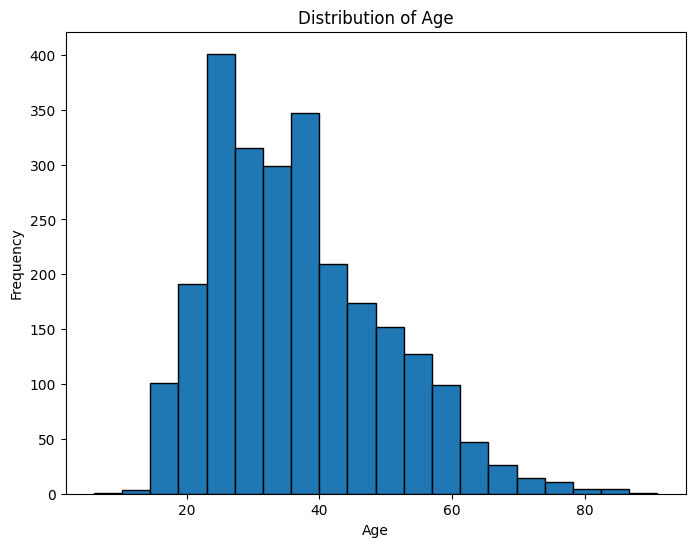

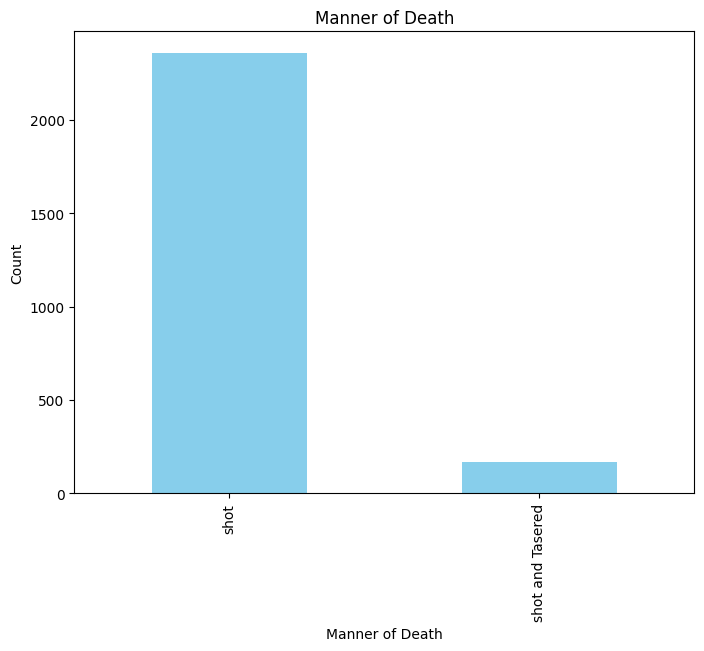

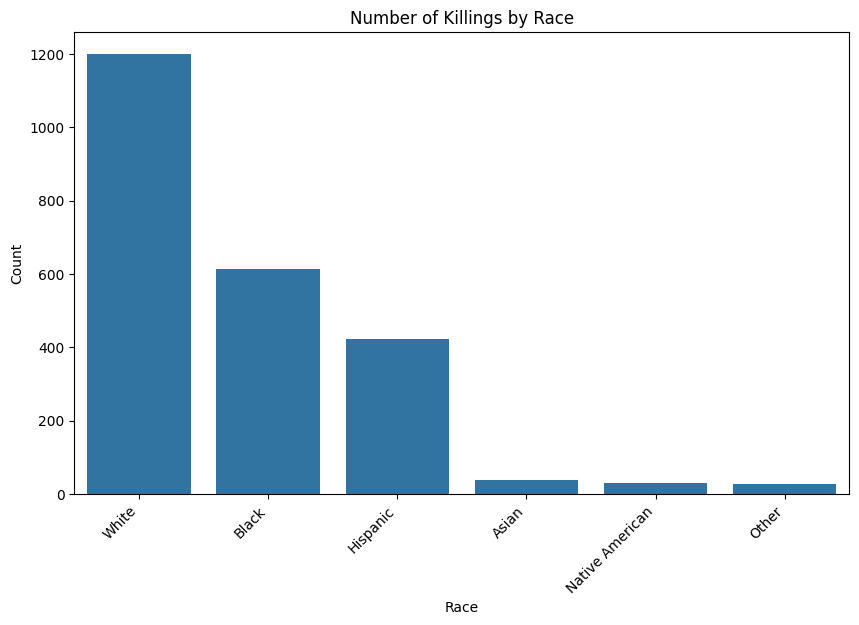

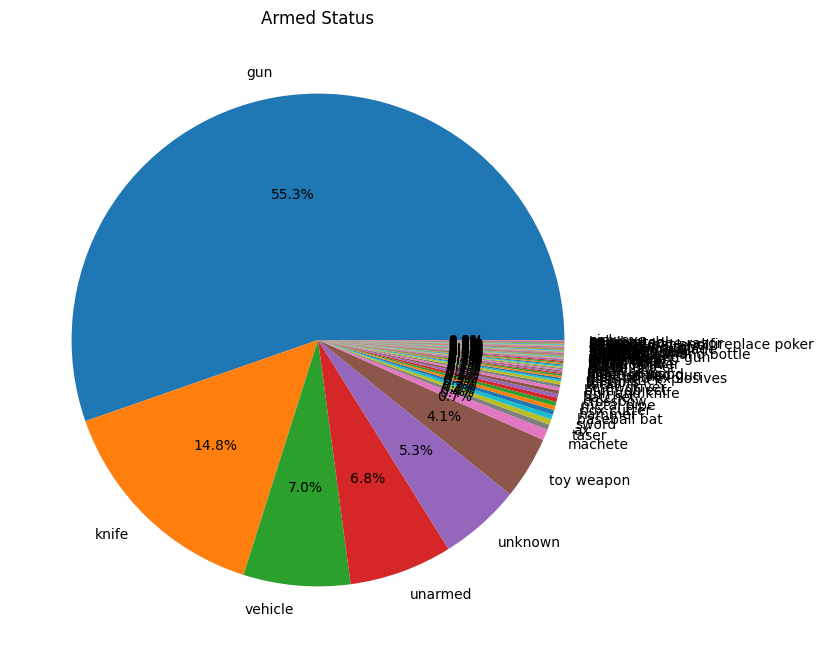

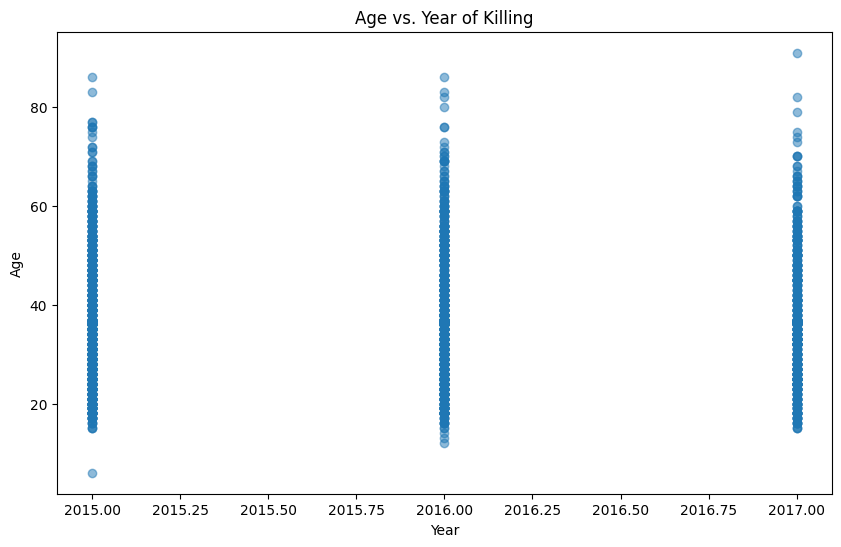

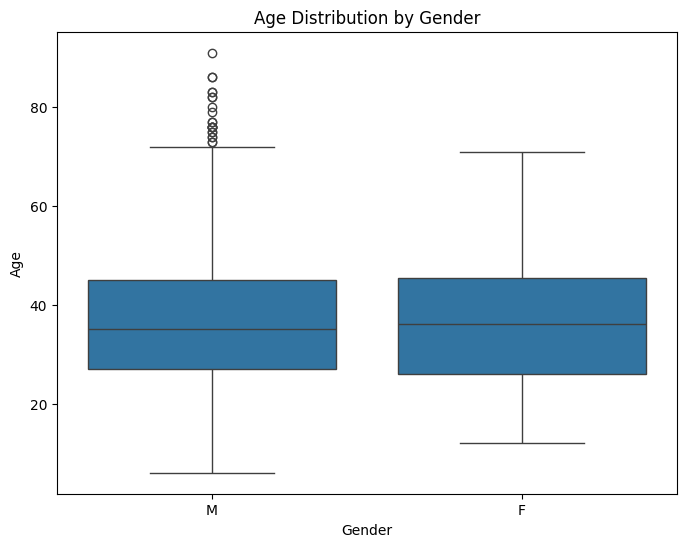

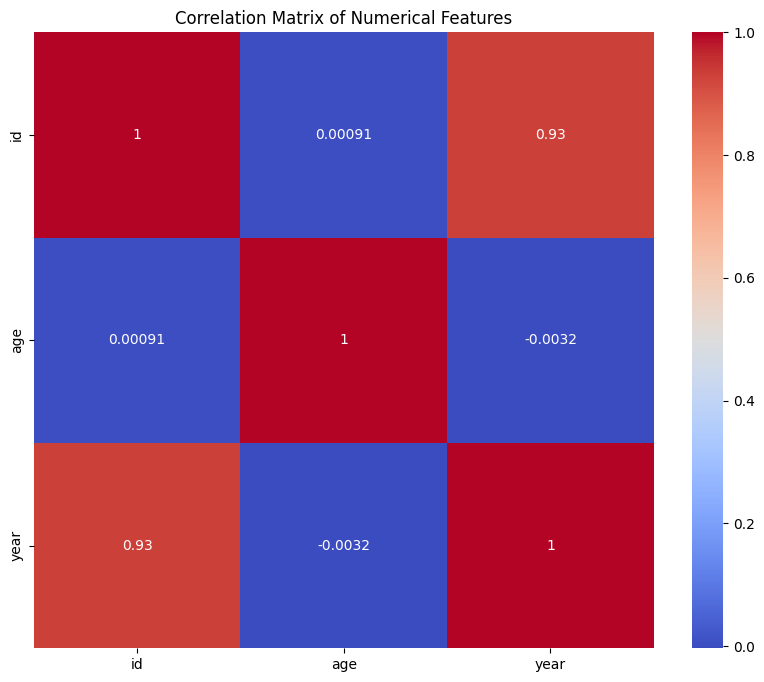

In [ ]:
# prompt: need 7 different types of graphs using matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'police' DataFrame is already loaded and cleaned as in your provided code

# 1. Histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(police['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# 2. Bar chart of Manner of Death
plt.figure(figsize=(8, 6))
police['manner_of_death'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Manner of Death')
plt.show()

# 3. Countplot of Race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=police, order=police['race'].value_counts().index)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Number of Killings by Race')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Pie Chart of Armed Status
plt.figure(figsize=(8, 8))
police['armed'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Armed Status')
plt.ylabel('')  # Hide the y-label
plt.show()


# 5. Scatter Plot of Age vs. Year (Assuming you have a 'year' column or can extract it)
police['year'] = pd.DatetimeIndex(police['date']).year
plt.figure(figsize=(10, 6))
plt.scatter(police['year'], police['age'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Age vs. Year of Killing')
plt.show()

# 6. Box Plot of Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=police)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

# 7. Heatmap of Correlation Matrix (for numerical features)
numerical_features = police.select_dtypes(include=['number'])  # Select numerical columns
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


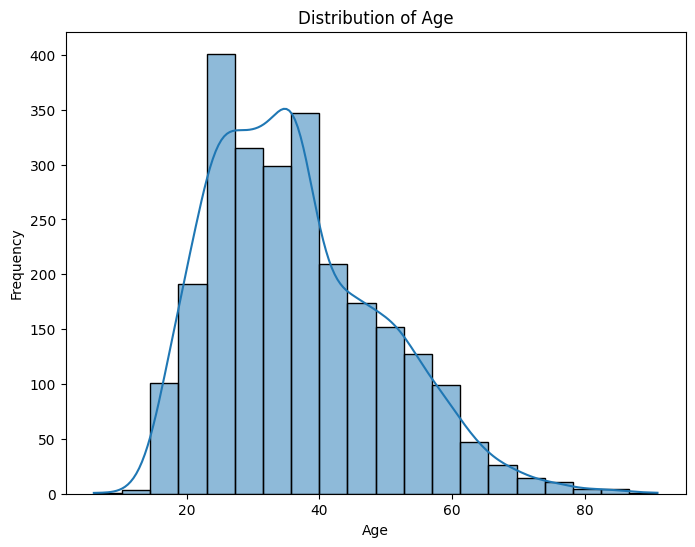

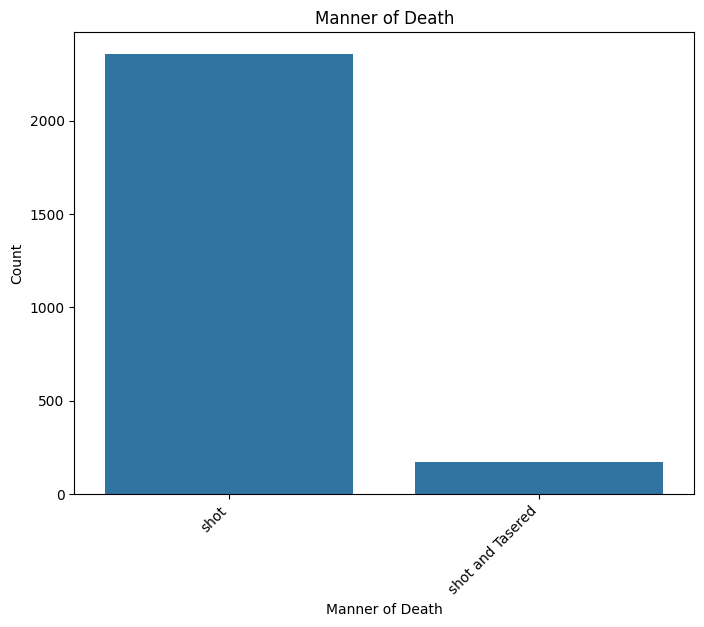

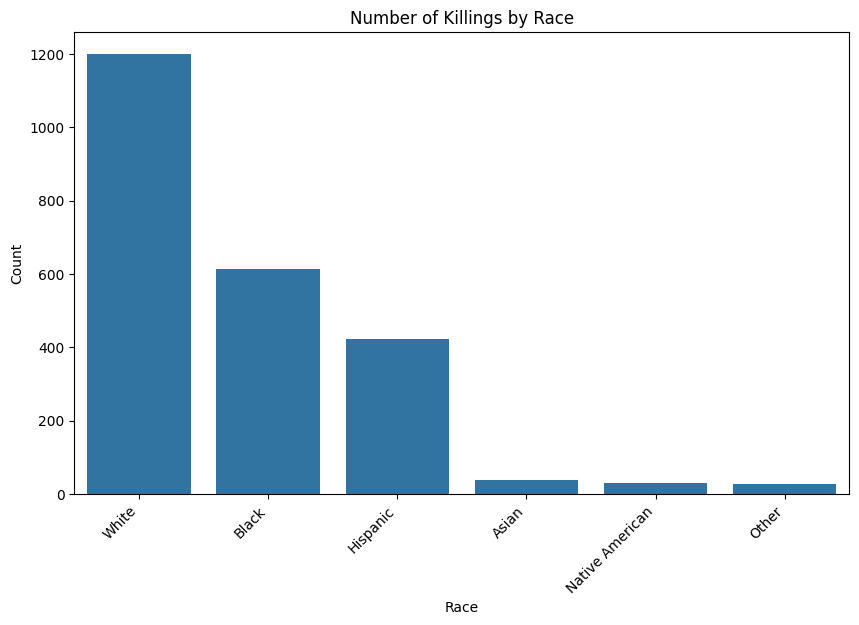

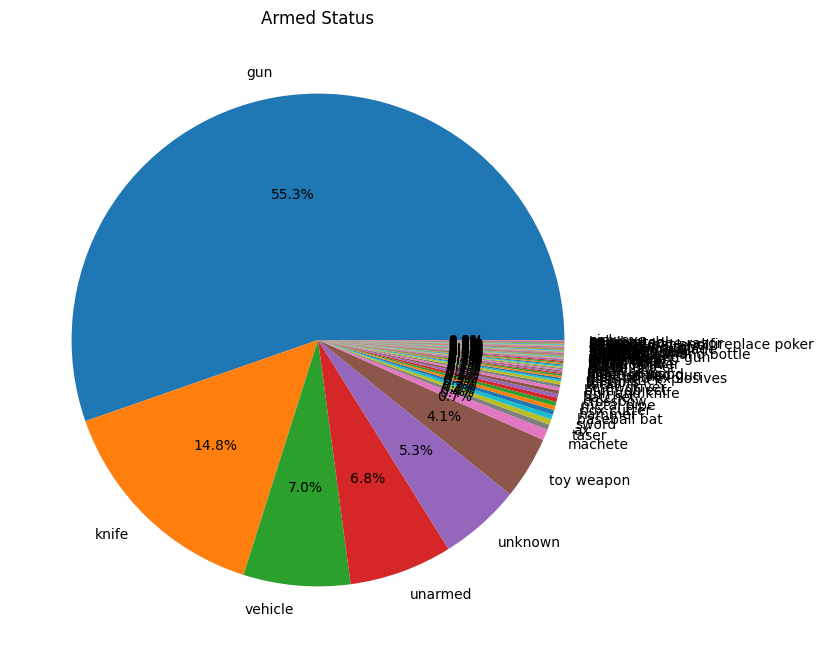

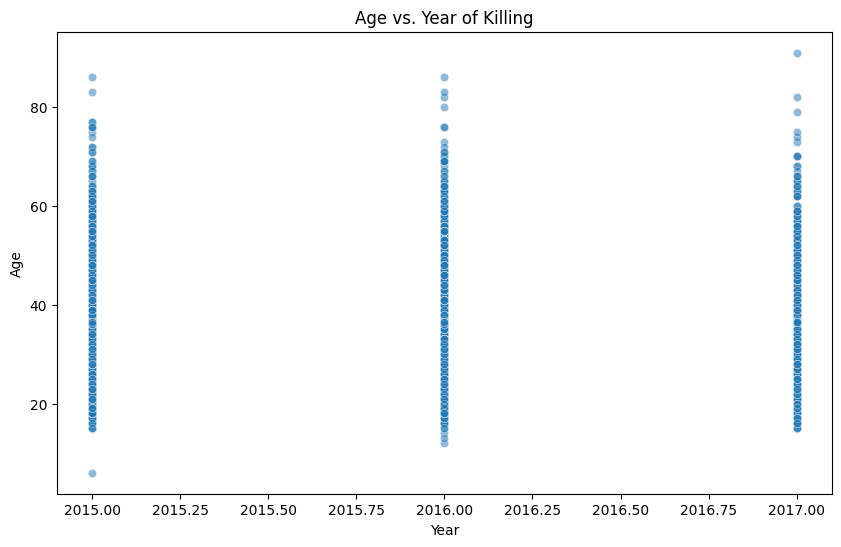

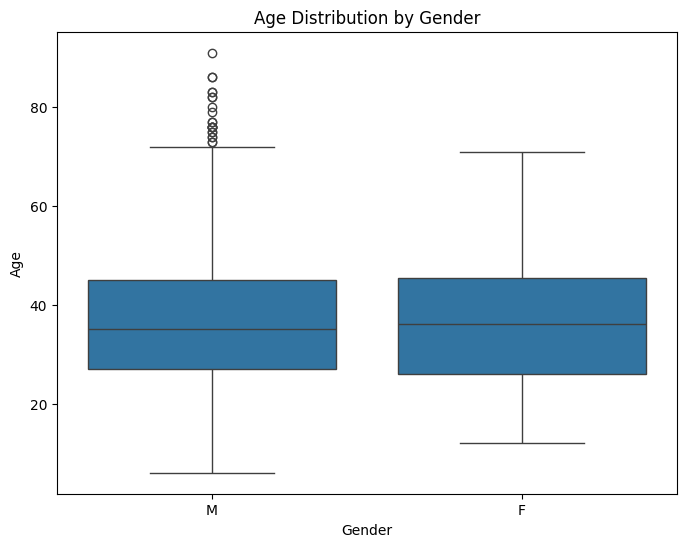

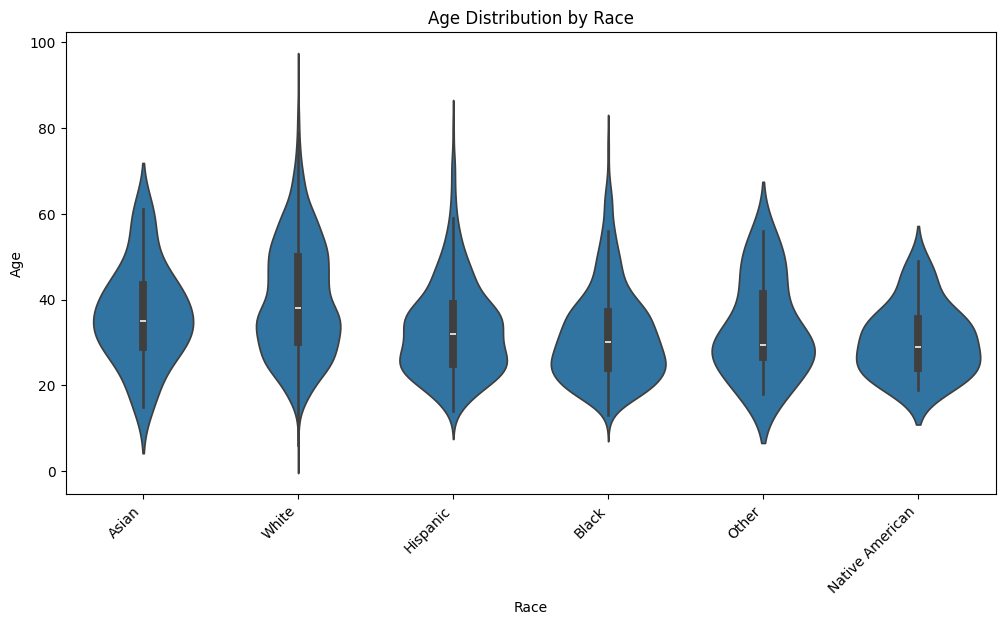

In [ ]:
# prompt: 7 different types of graphs using seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'police' DataFrame is already loaded and cleaned as in your provided code
# ... (Your existing code for data loading and cleaning) ...

# 1. Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(police['age'], bins=20, kde=True) # Using seaborn's histplot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# 2. Countplot of Manner of Death
plt.figure(figsize=(8, 6))
sns.countplot(x='manner_of_death', data=police, order=police['manner_of_death'].value_counts().index)
plt.xlabel('Manner of Death')
plt.ylabel('Count')
plt.title('Manner of Death')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

# 3. Countplot of Race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=police, order=police['race'].value_counts().index)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Number of Killings by Race')
plt.xticks(rotation=45, ha='right')
plt.show()


# 4. Pie Chart (using matplotlib since seaborn doesn't have a direct pie chart function)
plt.figure(figsize=(8, 8))
police['armed'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Armed Status')
plt.ylabel('')  # Hide the y-label
plt.show()

# 5. Scatter Plot of Age vs. Year
police['year'] = pd.DatetimeIndex(police['date']).year # Extract year from date
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='age', data=police, alpha=0.5) # Using seaborn's scatterplot
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Age vs. Year of Killing')
plt.show()

# 6. Box Plot of Age by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=police)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

# 7.  Violin Plot of Age by Race
plt.figure(figsize=(12,6))
sns.violinplot(x='race', y='age', data=police)
plt.xlabel('Race')
plt.ylabel('Age')
plt.title('Age Distribution by Race')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# prompt: explination the above 2 codes

#The provided code performs data cleaning, statistical analysis, and data visualization on a dataset of police killings in the US.  Let's break down the key parts and the improvements made.

**Original Code:**

1.  **Data Loading and Cleaning:** The code reads the data, handles missing values, standardizes categories (like race), and cleans inconsistent entries in the 'armed' column. It also handles date inconsistencies by converting the `date` column to datetime objects and drops any invalid dates.

2.  **Statistical Analysis:**
    *   **Chi-Squared Test:** Tests for an association between signs of mental illness and fleeing.
    *   **City Counts by State:** Counts the number of unique cities per state.
    *   **Cramers V (Gender vs. Race):** Measures the association between gender and race.
    *   **Correlation (Age and Date):** Attempts to correlate `age` with `date`.  This is not statistically meaningful.

3.  **Descriptive Statistics:** The code uses `.describe()` to get basic statistics for numerical columns.

**Improvements (Visualization Code):**

The original code lacked data visualization. The added visualization code enhances understanding by providing visual representations of the data:

1.  **Histograms (Age):** Shows the distribution of ages in the dataset.
2.  **Countplots (Manner of Death, Race):** Shows the frequency of each category for manner of death and race.
3.  **Pie Chart (Armed Status):**  Displays the proportion of different armed statuses.
4.  **Scatter Plot (Age vs. Year):** Plots age against the year of the incident.
5.  **Box Plots (Age by Gender):** Compares the distribution of age across different genders.
6.  **Heatmap (Correlation Matrix):** Visualizes the correlation matrix of numerical features.
7.  **Violin plot (Age by Race):**  Compares the distribution of age across different races, showing more details than a box plot.

**Key Improvements in the visualization code**

*   Use of `seaborn` library:  Seaborn provides more aesthetically pleasing and informative visualizations than the basic matplotlib functions.
*   Enhanced readability: Improved axis labels, titles, and rotated labels where necessary to enhance readability.
*   KDE in histograms:  Added Kernel Density Estimate (KDE) to the histograms to further illustrate the distributions.

**In Summary:**

The provided code now offers both statistical analysis and visual representations, providing a more complete understanding of the data than the original code. The visualizations make the insights from the data more readily apparent.


**Further suggestions:**


*   More advanced statistical tests: Consider other statistical tests that are suitable for your research question, like logistic regression or ANOVA, which allow for more sophisticated analyses and identification of variables that are statistically significantly influencing the outcome of interest.
*   Explore relationships between more variables: Create more visualizations to see relationships between variables that were not considered in the provided code.
*   Use more sophisticated data visualization techniques: Consider more advanced visualizations like interactive plots or geographical plots, depending on your research goals.




